<a href="https://colab.research.google.com/github/turrrray/datathon28-1-24/blob/main/Category_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 2024: Category A (Champions) Workshop

# 1 Preparing data

A model needs data to be trained for predictions. But there are steps needed to ensure that the data is cleaned and ready for a model - if the data is wrongly formatted or missing, the model will not work as intended.

The steps below will help you get started should you be new to the concept.

## 1.1 Preparing Data

To use colab environment, we need to mount Google Drive to Colab. Ensure you have dataset saved in or a shortcut to it created in 'My Drive', on your google drive. Use the cell below to open dataset on Google Colab.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

df2 = pd.read_csv('/content/drive/MyDrive/catA_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get information about our dataframe
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [ ]:
# find the number of rows and columns in our dataset
print(df2.shape)

# find the names of columns in our dataset
print(df2.columns)

(29182, 28)
Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Description', 'Square Footage',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Import/Export Status',
       'Fiscal Year End', 'Global Ultimate Company', 'Global Ultimate Country',
       'Domestic Ultimate Company', 'Is Domestic Ultimate',
       'Is Global Ultimate'],
      dtype='object')


In [ ]:
# check for the number of missing values in the dataframe
df2.isna().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [ ]:
# show count, mean, std, and quintile information for each numerical column
df2.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [ ]:
# a look at the first few rows of our data
df2.head(5)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


## 1.2 Processing Data


#### Drop NaN Values
- We choose to drop rows without latitude and longitude coordinates as they only form a very small part of our dataset.

In [ ]:
# removes rows without either lat or long coordinates
df2 = df2.dropna(subset=["LATITUDE", "LONGITUDE"])

#### One-Hot Encoding
We will also handle categorical variables by performing one-hot encoding on all columns with important categories as values. This is done by using the pd.get_dummies function.

An alternative approach using the LabelEncoder from scikit-learn is also demonstrated.

- Be cautious about the Curse of Dimensionality!

In [ ]:
# Remove rows where the Company Status is 'Inactive'
df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']

In [ ]:
# to ensure important info isnt being lost
df2['Import/Export Status_Missing'] = df2['Import/Export Status'].isna()

df3 = df2.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])

df3 = pd.get_dummies(df2, columns=['Entity Type'], prefix='Entity_Type')
df3 = pd.get_dummies(df2, columns=['Ownership Type'], prefix='Ownership_Type')
df3 = pd.get_dummies(df2, columns=['Import/Export Status'], prefix='Import_Export_Status')
df3 = df2.drop(columns=[col for col in ["Company Status (Active/Inactive)", "Entity Type", 'Import/Export Status', 'Ownership Type'] if col in df2.columns], errors='ignore') # are all Active

In [ ]:
# Check the number of null values
df3.isna().sum()

LATITUDE                                   0
LONGITUDE                                  0
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               430
Parent Company                           510
Parent Country                           516
Company Description                        0
Square Footage                         29062
Employees (Single Site)                12357
Employees (Domestic Ultimate Total)       78
Employees (Global Ultimate Total)       2766
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Fiscal Year End                        22356
Global Ultimate Company                  510
Global Ultimate Country                  519
Domestic Ultimate Company               1033
Is Domesti

In [ ]:
# Find the frequency of each industry
sic_code_frequency = df3['SIC Code'].value_counts()

# Set a threshold for low-frequency SIC Codes
threshold = 7  # Adjust this threshold based on your preference

# Identify SIC Codes with frequency below the threshold
low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

# Replace these low-frequency SIC Codes with a common label "Others"
df3['SIC Code'] = df3['SIC Code'].replace(low_frequency_sic_codes, 'Others')

sic_code_frequency1 = df3['SIC Code'].value_counts()

# Display the updated DataFrame
print(sic_code_frequency1)

6719.0    7743
8742.0    1387
Others     883
7371.0     774
4731.0     734
          ... 
781.0        7
2035.0       7
7313.0       7
3442.0       7
5441.0       7
Name: SIC Code, Length: 330, dtype: int64


In [ ]:
# convert to str cus we dont want it to be trained as a numeric value
# Convert the entire column to a common data type (string in this case)
df3['SIC Code'] = df3['SIC Code'].astype(str)

The alternative approach to encoding is indicated below to deal with SIC Codes.

For more information on SIC Codes, visit the site here: https://www.sec.gov/corpfin/division-of-corporation-finance-standard-industrial-classification-sic-code-list

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Use label encoding for 'SIC Code'
label_encoder = LabelEncoder()
df3['SIC Code'] = label_encoder.fit_transform(df3['SIC Code'])

In [ ]:
df3["SIC Code"].unique()

array([262, 108, 241, 329, 167, 296,  21, 272,  37, 243, 276, 240, 206,
       281, 118, 256,  99, 321,   5, 312, 104, 153, 325, 183, 160, 320,
       324, 247, 238, 163,  22, 120, 207,  49, 264, 143, 254, 125, 148,
       328, 166,  95, 111, 129, 199, 178, 156, 293, 237, 103, 299, 155,
        53,  67, 261, 137, 233, 106, 101, 217, 267, 212, 115,  18, 251,
       190, 310, 244, 316, 164, 222, 110, 248, 184,  39,  66, 286, 232,
       135, 128, 134, 284,  87, 185,  51, 173, 322,  34, 126, 259, 146,
       133,  71, 327, 298, 188, 142, 141, 308,  36, 107,  81, 219, 140,
       187, 144, 227, 246, 266, 102, 195, 202,  89,   2,   8,   7, 275,
       242,  84, 234, 269,  12, 149, 145,  60, 182, 213,  85, 157, 291,
       214, 287, 304,  90, 220, 317, 205, 113,  27, 257, 292, 158, 209,
        74, 273,  83, 307,   3,  11, 245, 323, 258, 122, 186, 139,  42,
       314, 179, 301, 162, 236, 196, 100, 305, 174,  73,  44,  14, 201,
        16, 193, 197,  93,  94,  96, 224, 229, 132,  48,  40,   

# 2 EDA

We will now proceed to analyze and visualize a subset of our data to gain some rough insight into how inputs in our data are related to our outputs.

## 2.1 Plotting Graphs

### Correlation Matrix

We will first use a Correlation Matrix to observe how a variable in the dataset are affected by other variables.

In [ ]:
# use of a correlation matrix to observe how variables in our dataset may be affected by others
numerical_df = df3.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Assuming correlation_matrix is your correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Print or use the correlation DataFrame as needed
correlation_df

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
LATITUDE,1.000000,-0.048014,-0.090848,-0.086741,-0.023920,NaN,0.001218,0.004256,-0.010028,0.004602,-0.010685,-0.004247,-0.039308
LONGITUDE,-0.048014,1.000000,0.019071,0.027591,-0.008341,NaN,-0.006147,0.013906,0.003871,-0.006884,0.008687,0.001314,0.009406
SIC Code,-0.090848,0.019071,1.000000,0.855014,0.146938,NaN,-0.037077,-0.012975,-0.000513,-0.014151,-0.023470,0.011546,0.090281
8-Digit SIC Code,-0.086741,0.027591,0.855014,1.000000,0.195899,NaN,-0.051843,-0.022186,0.001599,-0.011617,-0.014653,0.016634,0.087467
Year Found,-0.023920,-0.008341,0.146938,0.195899,1.000000,NaN,-0.060604,-0.046587,-0.026246,0.014576,-0.022241,0.076406,0.112065
Square Footage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employees (Single Site),0.001218,-0.006147,-0.037077,-0.051843,-0.060604,NaN,1.000000,0.138964,0.008485,0.003552,0.001486,-0.016532,0.004826
Employees (Domestic Ultimate Total),0.004256,0.013906,-0.012975,-0.022186,-0.046587,NaN,0.138964,1.000000,0.020450,0.016899,0.024313,-0.060773,-0.044315
Employees (Global Ultimate Total),-0.010028,0.003871,-0.000513,0.001599,-0.026246,NaN,0.008485,0.020450,1.000000,-0.003975,0.664014,0.076335,-0.087309
Sales (Domestic Ultimate Total USD),0.004602,-0.006884,-0.014151,-0.011617,0.014576,NaN,0.003552,0.016899,-0.003975,1.000000,0.098417,-0.054627,-0.039397


### Geospatial Analysis

This can be done either with Matplotlib (Plot latitude against longitude) or Folium (to visualize each pair of coordinates on a map of Singapore).

We will create a copy of our previously created dataframe and subset a small portion of it to perform the analysis on.

In [ ]:
# import required libraries
import matplotlib.pyplot as plt

# we will need this for the color gradient representing how high the domestic sales figure is.
from matplotlib.colors import LogNorm
import seaborn as sns

In [ ]:
# for the upcoming geospatial analysis portion, we will use a small subset of the data provided for plotting.
filtered_df = df2[df2['SIC Code'].isin([5099, 1611, 8711, 4789])]

filtered_df.head(2)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Import/Export Status_Missing
30,1.264843,103.818291,LAKB2BID1337916,STATKRAFT HOLDING CHILE PTE. LTD.,8711.0,Engineering Services,87110000.0,Engineering services,2003.0,Subsidiary,...,9830186.0,7.412580e+09,NaN,NaN,Statkraft Sf,Norway,STATKRAFT HOLDING SINGAPORE PTE. LTD.,0.0,0.0,True
48,1.309792,103.865024,LAKB2BID9109451,ZALL INTERNATIONAL COMMERCE (SINGAPORE) PTE. LTD.,5099.0,"Durable Goods, Not Elsewhere Classified",50990000.0,"Durable goods, nec",2020.0,Subsidiary,...,147815.0,1.478150e+05,NaN,2021-12-31T05:00:00Z,ZALL SMART COMMERCE (SINGAPORE) PTE. LTD.,Singapore,ZALL SMART COMMERCE (SINGAPORE) PTE. LTD.,0.0,0.0,True


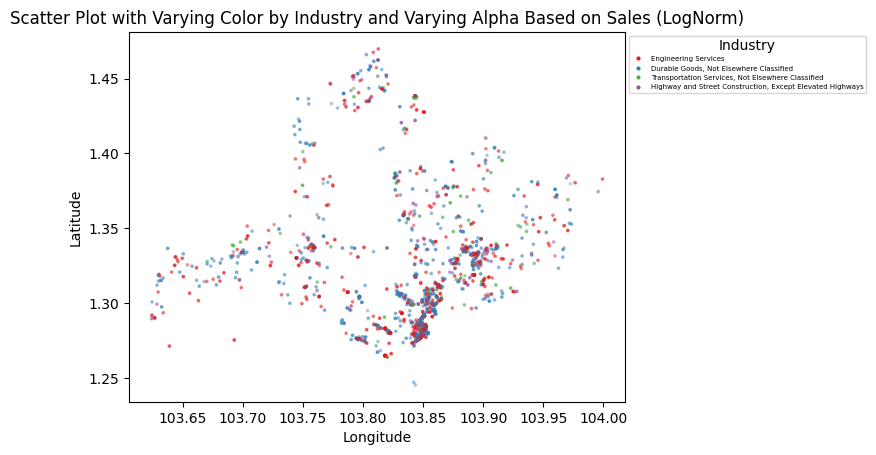

In [ ]:
# read in the filtered dataset and do EDA. confusion matrix, etc
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a constant color (e.g., blue)
constant_color = 'blue'

# Define a color palette based on unique industries
industry_palette = sns.color_palette('Set1', n_colors=len(filtered_df['Industry'].unique()))

# Create a dictionary to map Industry to a unique color
industry_colors = dict(zip(filtered_df['Industry'].unique(), industry_palette))

# Scatter plot with varying color by Industry and varying alpha based on Sales values
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Industry'].map(industry_colors), s=3, alpha=norm(filtered_df['Sales (Domestic Ultimate Total USD)']))

# Add a legend for Industry
legend_labels = filtered_df['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry,
                              markerfacecolor=industry_colors[industry], markersize=4) for industry in legend_labels]
plt.legend(handles=legend_handles, title='Industry', prop={'size': 5}, loc='upper left', bbox_to_anchor=(1, 1))

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')

# Show the plot
plt.show()

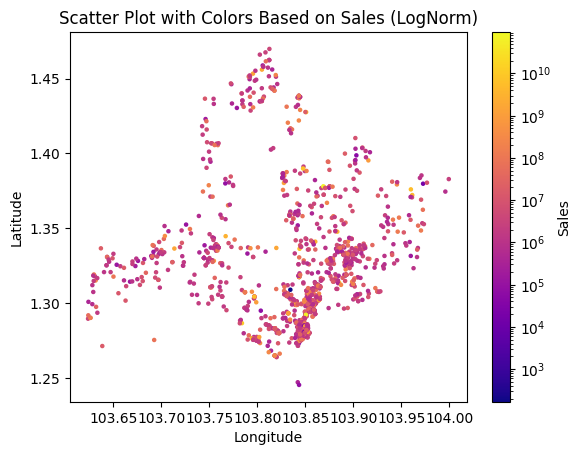

In [ ]:
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a colormap transitioning from blue to red
cmap = 'plasma'

# Scatter plot with colors based on Sales values and LogNorm
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)

# Add a colorbar
cbar = plt.colorbar(scatter, label='Sales')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')

# Show the plot
plt.show()

## 2.2 Feature Selection
We will remove features that are of the following:
- seemingly irrelevant to affecting the output by domain knowledge;
- Low/Zero-variance Factors.

We will also filter our dataset to select only the rows of data we are interested in.

In [ ]:
# Specify columns to drop
columns_to_drop = ["error", "Fiscal Year End", "Sales (Global Ultimate Total USD)", "Global Ultimate Company", "Domestic Ultimate Company", "Web Address",
                   "Sales (Global Ultimate Total USD)", "Square Footage", "Company Description", "PostCode", "8-Digit SIC Code", "8-Digit SIC Description", "AccountID",
                   "Parent Company", "City", "Country", "Address", "Address1", "Industry", "Region", "Parent Country", "Global Ultimate Country", "Company"]

# Drop columns if they exist in the DataFrame
df4 = df3.drop(columns=[col for col in columns_to_drop if col in df3.columns], errors='ignore')

In [ ]:
df4 = df4.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])

### Data Type Conversion

We will need to convert some columns into datatypes that are suitable for analysis. This makes sure that the values in these fields make sense.

In [ ]:
# Convert 'Is Domestic Ultimate' to True/False
df4['Is Domestic Ultimate'] = df4['Is Domestic Ultimate'] == 1
df4['Is Global Ultimate'] = df4['Is Global Ultimate'] == 1

In [ ]:
df4.columns

Index(['LATITUDE', 'LONGITUDE', 'SIC Code', 'Year Found',
       'Employees (Single Site)', 'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Import/Export Status_Missing'],
      dtype='object')

# 3 Model Training and Evaluation

## 3.1 Selecting a Model
Selecting a model involves a couple of decisions to make:

- Train-test Split: the proportion of data used to train, test and evaluate our data,
- Type of ML model used (well-known ones include Decision Trees, Random Forests, Support Vector Machines, Linear/Logistic Regression and Neural Networks).

In our case, we will use the Gradient Boosting Regressor provisioned by scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Separate features and target variable
X = df4.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df4['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

### Cross-Validation

We will also perform a K-fold Cross Validation. This helps us mitigate the risk of overfitting on a specific set of data, by being able to split the data into K number of folds, test on 1 fold and train for the rest for K number of times.

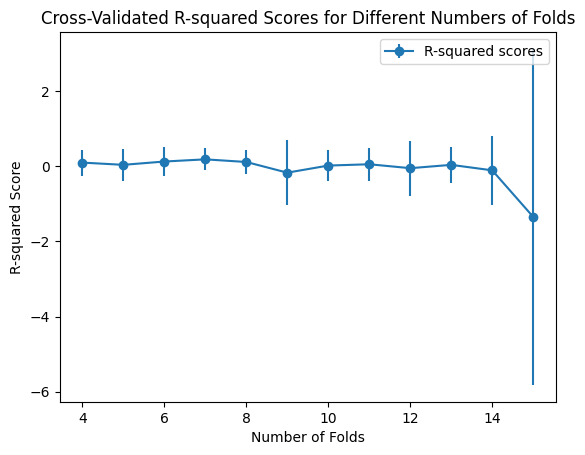

In [ ]:
# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

## 3.2 Model Evalutation Metrics

There are many ways to evaluate a Machine Learning model:

- Residual Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Average Percentage Error (MAPE) for Regression Tasks;
- Confusion Matrix, AUC-ROC Curve for Classification Problems;
- and other variants of such metrics.

In this problem, MSE will be very big as the sales are very large by nature. We will opt to use the R-Squared Score (used to score how well a regression model fits its data).

In [ ]:
# Use k-fold cross-validation with 10 folds
model_10 = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [-0.14086798  0.36321037 -0.81018188 -0.58391975  0.04533386 -0.09973026
  0.39892718  0.5850862   0.33349208  0.10545415]
Mean R-squared score: 0.019680397388576278
Standard Deviation of R-squared scores: 0.4220256997394934
Test R-squared score: 0.2574101425889155


minimal submission -- can go steps further to improve the model, ie creating artificial features, feature engineering, clustering etc.

# Saving and testing the model

We will export our model into a Hierarchical Data Format 5 File (.h5) for use by others. A general use case will also be covered in the form of a function below.

In [ ]:
import joblib

# Save the base model to an HDF5 file
joblib.dump(model_10, 'base_model.h5')

['base_model.h5']

In [ ]:
def test_model(data):
    # we assume the data is cleaned
    # To load the model in the future
    loaded_model = joblib.load('./base_model.h5')
    predictions = loaded_model.predict(data)

    return predictions

# Extract the last row of the test set
last_row = X_test.iloc[[1]]

# Make predictions on the last row
print(test_model(last_row))

[74087900.2682466]


Feel free to explore the functions as written above and play around with more models! You may be able to achieve a higher accuracy.

Happy learning and coding!